### Loading the Dataset

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('heart.csv')

### Basic Data Summary

In [4]:
print("Basic Data Summary:")
print("Shape of the dataset:", data.shape)
print("First 5 rows of the dataset:")
print(data.head())

Basic Data Summary:
Shape of the dataset: (918, 12)
First 5 rows of the dataset:
   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  


Our dataset includes 918 entries across 12 clinical features. The variables range from basic demographics like age and sex to medical measurements such as cholesterol levels and maximum heart rate.

### Summary statistics for numerical variables

In [5]:
print("\nSummary Statistics for Numerical Variables:")
print(data.describe())


Summary Statistics for Numerical Variables:
              Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000  


1. The average age of the individuals in the dataset is approximately 53.51 years, ranging from 28 to 77 years.  
2. The resting blood pressure (RestingBP) shows an average value of 132.40 mmHg, with extremes varying from 0 to 200 mmHg. Cholesterol levels have a mean of 198.80 mg/dL, with a notable range from 0 to 603 mg/dL.  
3. About 23.31% of the individuals exhibit fasting blood sugar (FastingBS) levels above 120 mg/dL.  
4. The maximum heart rate (MaxHR) recorded averages at 136.81 bpm, with a spread from 60 to 202 bpm.  
5. The old peak (Oldpeak) ST depression induced by exercise relative to rest shows an average value of 0.89, ranging from -2.6 to 6.2.  
6. Lastly, 55.34% of the individuals have been diagnosed with heart disease, indicating a significant prevalence of heart conditions within the sample.  

### Distribution plots for all numerical variables

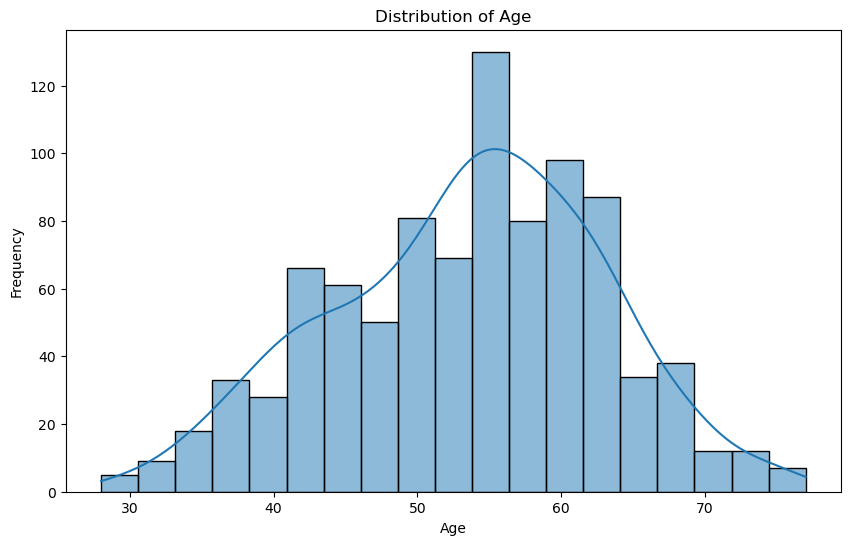

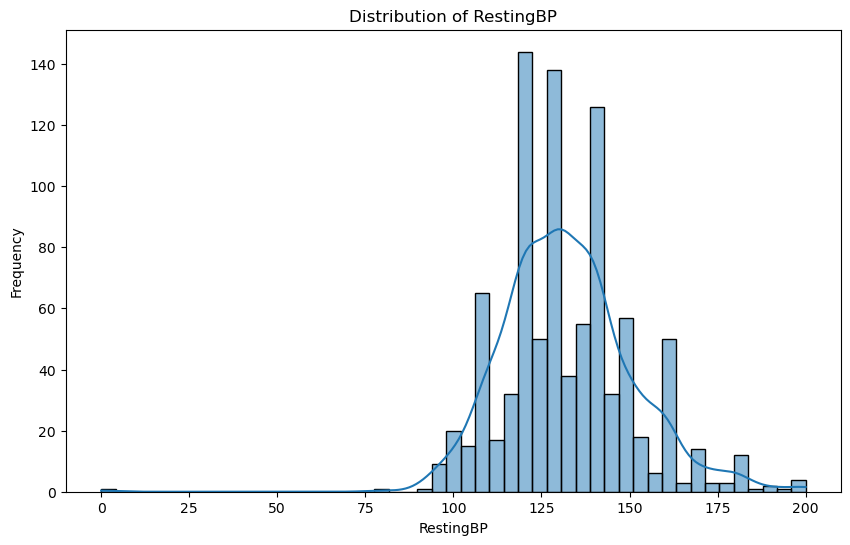

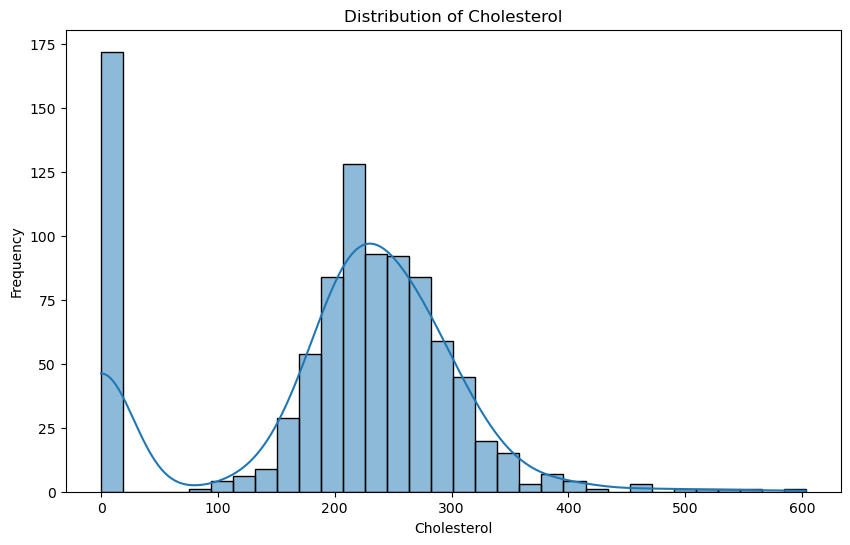

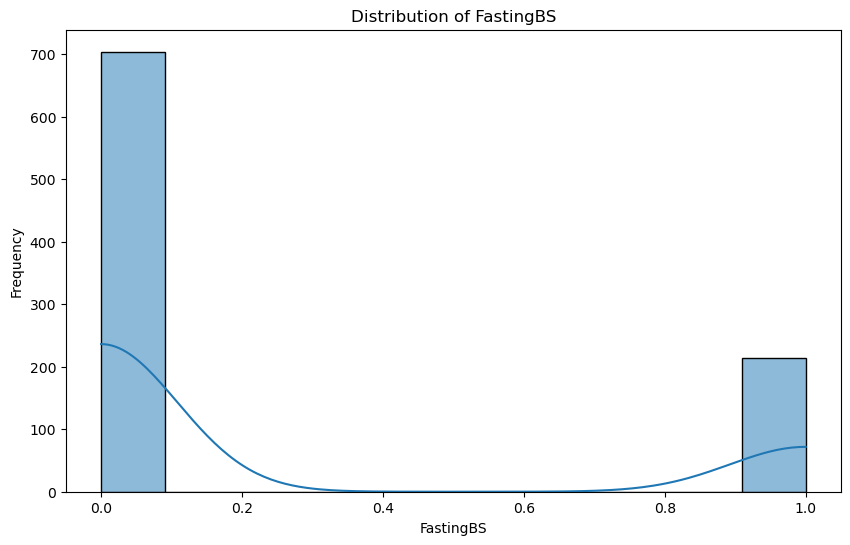

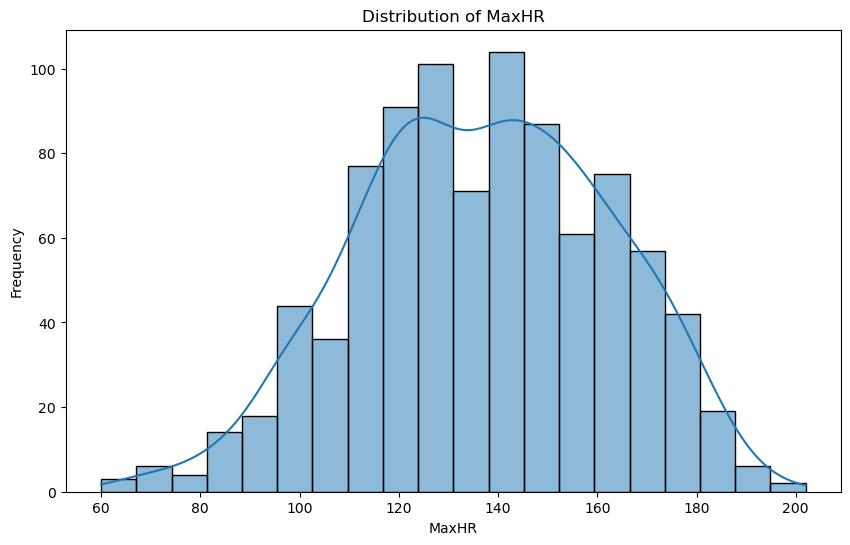

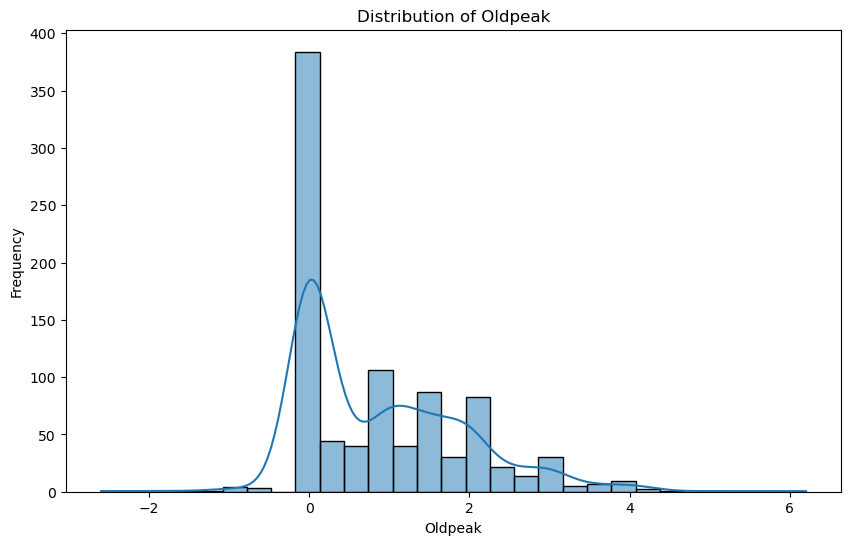

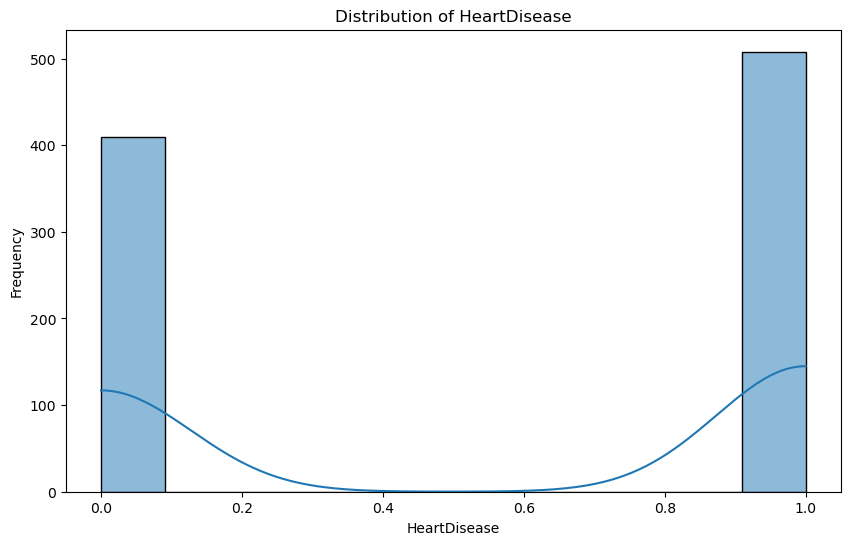

In [6]:
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

1. The age distribution chart reveals a bell-shaped curve, suggesting a normally distributed age range with most subjects falling between 50 and 60 years old. Older age groups seem to be more represented in the dataset, which aligns with the increased risk of heart disease in the aging population. The correlation with heart disease is also positive, reaffirming the need to consider age as a significant risk factor in the predictive model.  
2. For the variable RestingBP, While most subjects are within the normal range, the presence of subjects with higher values suggests a segment at risk. The correlation with heart disease is modest, indicating it should be a part of the risk assessment, albeit not the strongest predictor.  
3. The cholesterol graph exhibits a right-skewed distribution, with a peak suggesting that most individuals have cholesterol levels around the 200 to 300 mg/dL range. High cholesterol is a significant concern for heart disease.its negative correlation with 'MaxHR' suggests that individuals with higher cholesterol might have reduced cardiac performance. Its negative correlation with heart disease in the heatmap may need further investigation, as higher cholesterol is typically a risk factor for heart disease.  
4. In the fasting blood sugar chart, we see a bimodal distribution, where most individuals have a fasting blood sugar below the diabetes threshold, but a substantial number exceed it, highlighting a subgroup at elevated risk.Its positive correlation with heart disease reaffirms its inclusion in the predictive model.  
5. The MaxHR data portrays a near-normal distribution, with some outliers. A higher maximum heart rate during exercise is generally healthier, as shown by the negative correlation with HeartDisease.  
6. Presence of Heart Disease outcome shows a nearly even split in the dataset, suggesting our dataset has a balanced representation of cases with and without heart disease, which is ideal for model training.  


### Count plots for all categorical variables

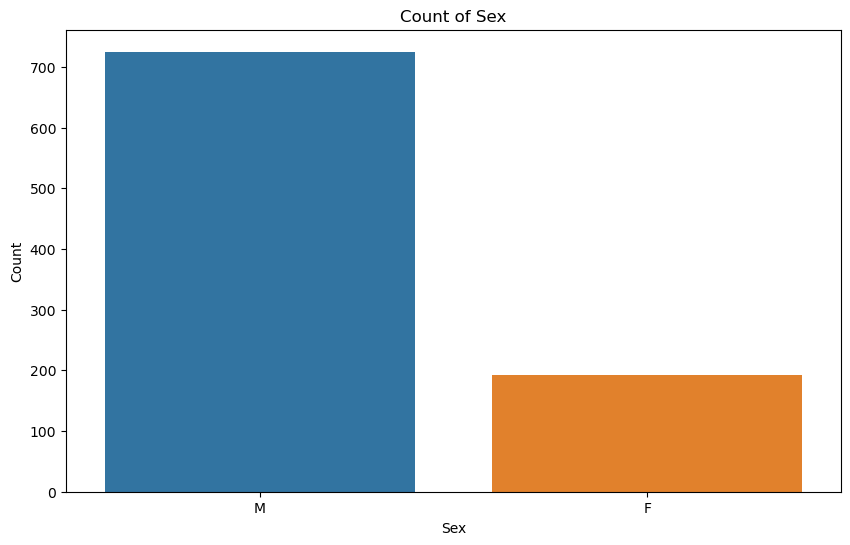

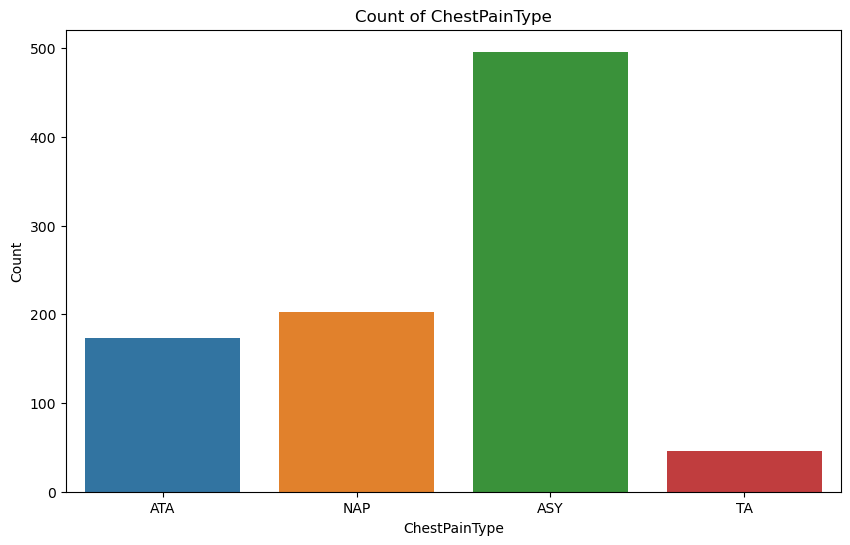

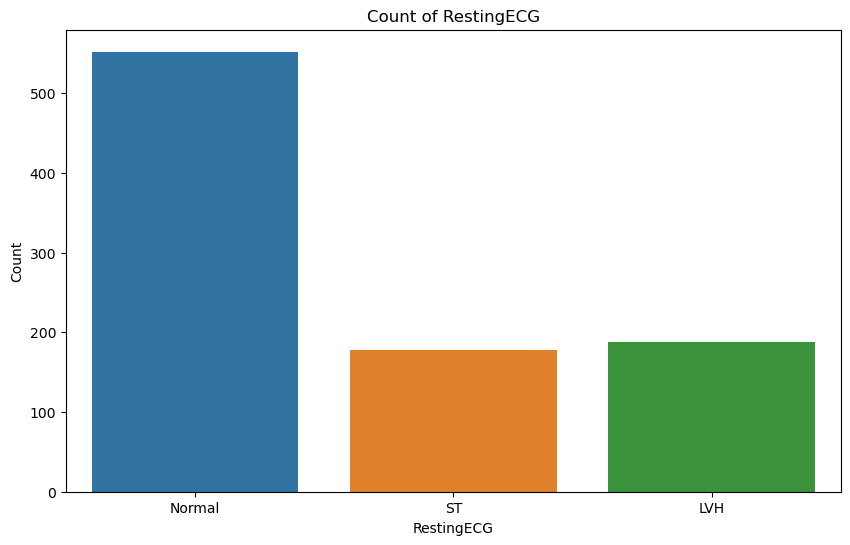

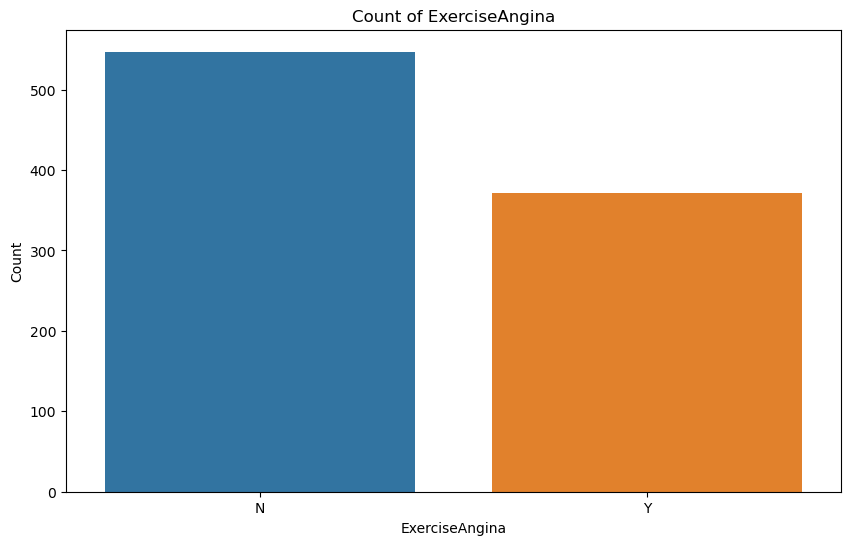

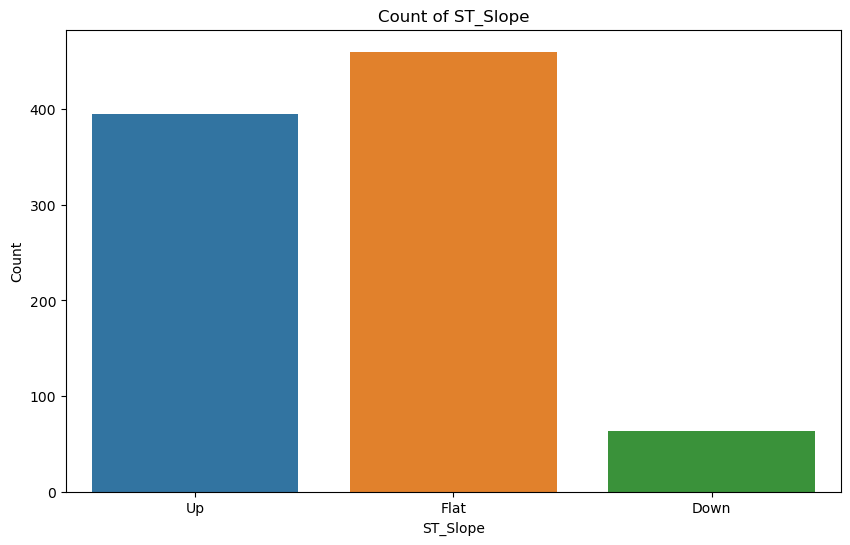

In [7]:
categorical_columns = data.select_dtypes(include=['object', 'category']).columns
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, data=data)
    plt.title(f'Count of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

1. The count of RestingECG results shows three categories. The 'Normal' category is the most frequent, followed by 'ST' abnormalities, with 'LVH' being the least common. These variations are essential predictors in our model.  
2. Exercise-induced angina is an important clinical marker. Our dataset shows a higher prevalence of subjects without exercise-induced angina, which can be a good prognostic sign. However, those who do experience it are at a higher risk of heart disease, making this variable a significant predictor.  
3. The ST_Slope after exercise is indicative of heart health. The majority of our subjects show an 'up' slope, typically associated with a healthier heart, while a 'flat' or 'down' ST_Slope can be worrisome signs, often linked with higher heart disease risk.  


### Correlation heatmap

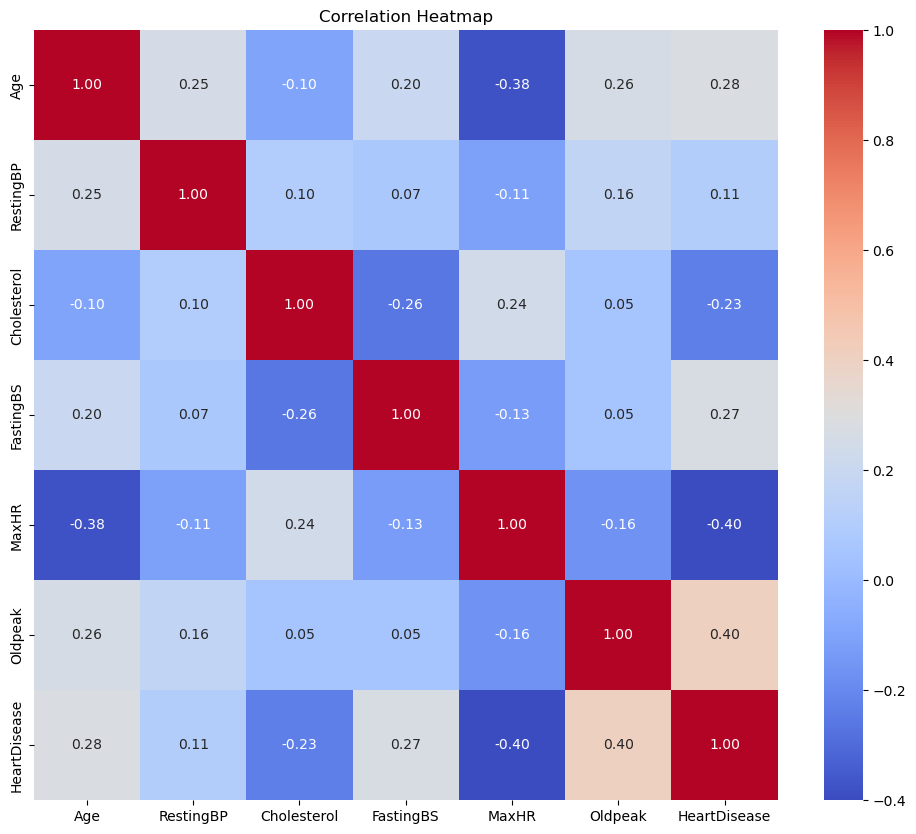

In [8]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(12, 10))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

1. **Age**:
   - Shows a strong negative correlation with MaxHR (-0.38), indicating that maximum heart rate tends to decrease as age increases.

2. **RestingBP**:
   - No significant correlations observed with other variables as all are fairly weak.

3. **Cholesterol**:
   - No significant correlations observed with other variables as all are fairly weak.

4. **FastingBS**:
   - Shows a moderate negative correlation with MaxHR (-0.13), suggesting that higher fasting blood sugar levels might be associated with a lower maximum heart rate.

5. **MaxHR**:
   - Besides its strong negative correlation with Age (-0.38), it also shows a notable negative correlation with HeartDisease (-0.40), which could suggest that higher maximum heart rates are associated with a lower occurrence of heart disease.

6. **Oldpeak**:
   - Has a moderate positive correlation with HeartDisease (0.40), indicating that higher ST depression (Oldpeak) values are associated with a higher presence of heart disease.

7. **HeartDisease**:
   - In addition to its correlation with Oldpeak (0.40), it shows a moderate negative correlation with MaxHR (-0.40), reinforcing the potential link between lower maximum heart rates and increased incidence of heart disease.

These points reflect the more significant relationships in the dataset.

### Radar Chart: to compare multiple variables simultaneously for different group

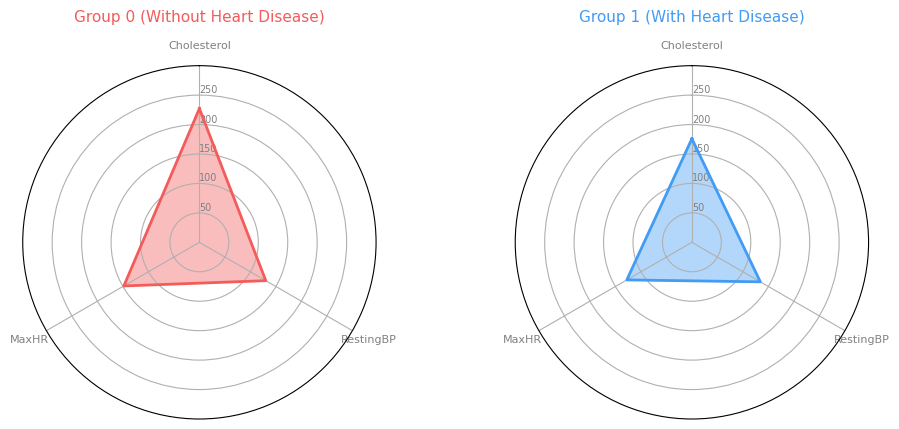

In [12]:
import numpy as np

# Calculate the mean values for each group
metrics = ['Cholesterol', 'RestingBP', 'MaxHR']  # Add other metrics as needed
grouped = data.groupby('HeartDisease')[metrics].mean().reset_index()

# Function to create a radar chart
def make_spider(row, title, color):
    # Number of variables we're plotting.
    categories = list(grouped)[1:]
    N = len(categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variables)
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(2, 2, row+1, polar=True)

    # If you want the first axis to be on top:
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels
    plt.xticks(angles[:-1], categories, color='grey', size=8)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([50, 100, 150, 200, 250], ["50", "100", "150", "200", "250"], color="grey", size=7)
    plt.ylim(0,300)

    # Ind1
    values = grouped.loc[row].drop('HeartDisease').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)

    # Add a title
    plt.title(title, size=11, color=color, y=1.1)

# Create a color palette
colors = ["#f45b5b", "#429bf4"]

# Create plot
plt.figure(figsize=(10, 8))
for i in range(2):
    make_spider(i, f'Group {i} ({"With" if i==1 else "Without"} Heart Disease)', colors[i])

plt.tight_layout()
plt.show()

From this visual representation, valuable insights can be gleaned:

1. **Cholesterol Levels**:
   - Both groups show substantial average cholesterol levels, but it's notable that Group 1, those with heart disease, have a larger area under the curve for cholesterol, suggesting higher average cholesterol levels in this group compared to those without heart disease.

2. **Resting Blood Pressure (RestingBP)**:
   - The radar chart suggests that the average resting blood pressure is higher in the group with heart disease. This is indicated by the more extended radial line for Group 1, pointing to a potential link between elevated blood pressure and the risk of heart disease.

3. **Maximum Heart Rate (MaxHR)**:
   - In contrast, the maximum heart rate shows a reverse trend. Group 0, without heart disease, has a higher average maximum heart rate than Group 1. This could suggest that those without heart disease have better cardiac function, as evidenced by a higher achievable heart rate, or it might reflect a compensatory response in the absence of heart disease.

It supports the understanding that higher average cholesterol and resting blood pressure are associated with heart disease, while a lower maximum heart rate could be an indicator of heart health issues. 